In [1]:
# CAP 5415 Programming Assignment 05: Otsu Thresholding for Image Segmentation

"""
 In normal image binarization, we have to choose the threshold value manually. Often we have to test out multiple threshold values  to find the best one for the particular task. 
 However with Otsu Thresholding, we can automate this search for the ideal threshold value. Otsu thresholding calcualtes an optimal threshold value that minimizes variance within a class between foreground and background pixels

 
Sources:

Intro to Otsu Thresholding: https://learnopencv.com/otsu-thresholding-with-opencv/
Otsu Thresholding from Scratch: https://medium.com/geekculture/image-thresholding-from-scratch-a66ae0fb6f09


"""

'\n In normal image binarization, we have to choose the threshold value manually. Often we have to test out multiple threshold values  to find the best one for the particular task. \n However with Otsu Thresholding, we can automate this search for the ideal threshold value. Otsu thresholding calcualtes an optimal threshold value that minimizes variance within a class between foreground and background pixels\n\n \nSources:\n\nIntro to Otsu Thresholding: https://learnopencv.com/otsu-thresholding-with-opencv/\nOtsu Thresholding from Scratch: https://medium.com/geekculture/image-thresholding-from-scratch-a66ae0fb6f09\n\n\n'

In [2]:
# Import packages

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os


input_folder = "Input_Images"

In [3]:
# Create Otsu Thresholding Algorithm

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img


In [4]:
# Loop through folder and generate binarize images

input_images_array= Path(input_folder).glob('*.jpeg')
output_array = []


for image in input_images_array:
        # Load image, load the filename and convert the image to an array.
        filename = os.path.basename(image).split('.',1)[0]
        im = Image.open(image).convert("L")
        im = np.asarray(im)
        im_filtered = otsu(gray=im)
        output_array.append(im_filtered)

        # Save the Edged X-Direction images into the folder directory named "02_Gradient_Edge_Detection_X"  
        plt.imsave(f"Output_Images/{filename}_otsu.png",
                im_filtered.astype(np.uint8),
                cmap=plt.cm.Greys_r
            )
        


        


        


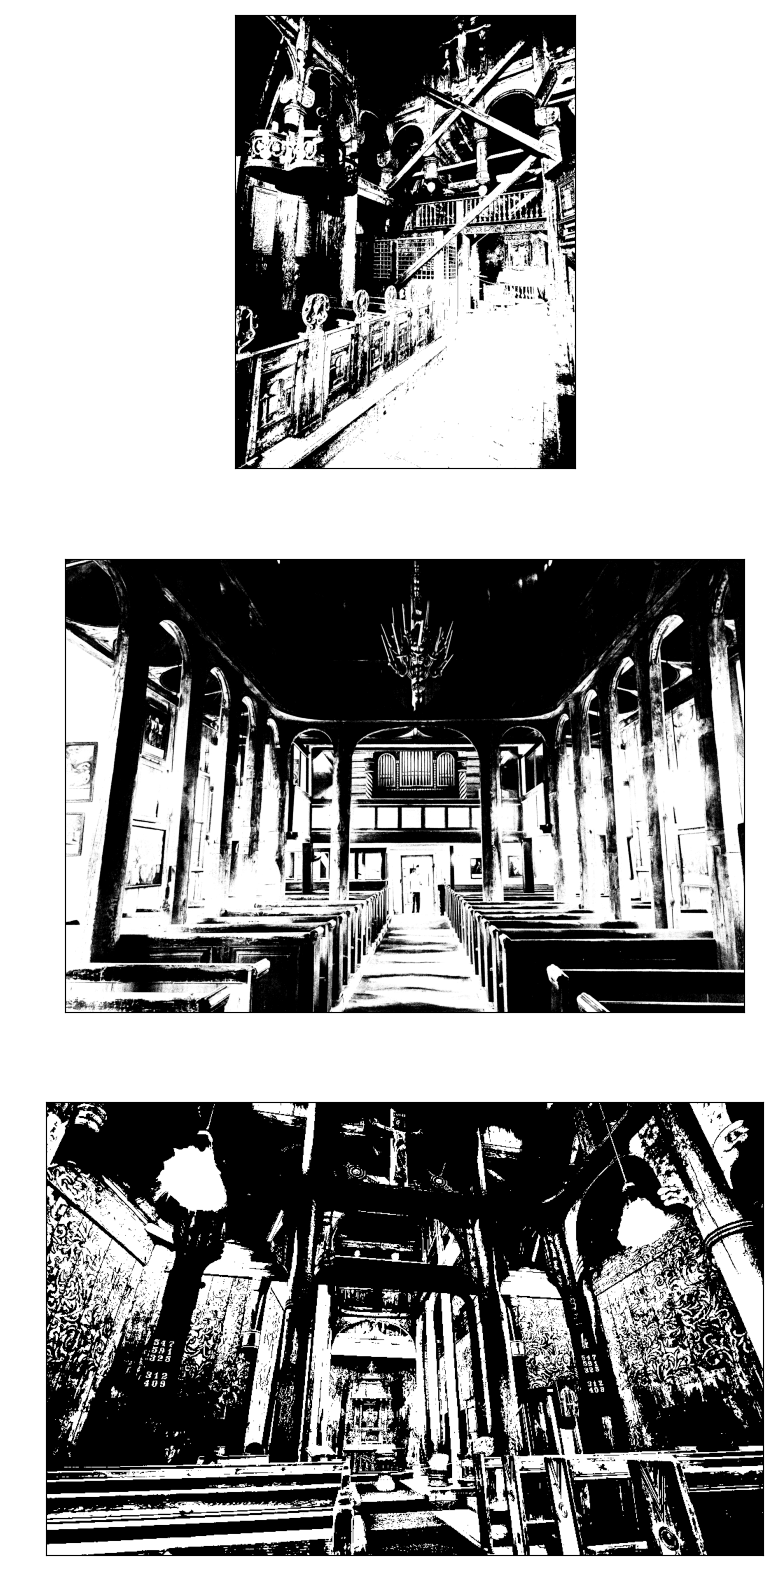

In [19]:
# Show Otsu Images

# plt.figure(figsize=[20,10],frameon=False,layout="constrained")

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(output_array),1, figsize=(20,20)) 
f.patch.set_alpha(0.2)


for i,image in enumerate(output_array):
   axarr[i].tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
   axarr[i].imshow(image, cmap=plt.cm.Greys_r)
   